# 1단계. 데이터 전처리

### 데이터 불러오기

In [1]:
import pandas as pd

data = pd.read_excel('Basic_preprocessed_두리발_2020년1월_2022년7월_콜상세내역.xlsx')
data

,접수일시,월,출발지역,목적지역,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,요일,거리
0,2020-01-01 05:06:44.297,1,부산 사상구,부산 사상구,489507,285817,491872,284227,41.345050,False,True,5,2,2849.793852
1,2020-01-01 05:32:39.097,1,부산 연제구,부산 부산진구,498495,288086,495760,284851,18.931717,False,True,5,2,4236.207030
2,2020-01-01 05:57:06.427,1,부산 연제구,부산 사하구,498923,286584,487815,279035,82.792883,False,True,5,2,13430.378438
3,2020-01-01 06:21:30.313,1,부산 부산진구,부산 금정구,493723,285383,499594,297423,51.678117,False,True,6,2,13395.157371
4,2020-01-01 06:33:43.930,1,부산 북구,부산 부산진구,494108,290599,498091,287066,33.817833,False,True,6,2,5324.131666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610320,2022-07-31 21:13:08.880,7,부산 동래구,부산 해운대구,501300,288679,507568,286400,41.235333,True,False,21,6,6669.457624
610321,2022-07-31 21:35:45.633,7,부산 해운대구,부산 해운대구,506206,292715,509093,287693,49.372783,True,False,21,6,5792.689617
610322,2022-07-31 21:46:47.023,7,부산 해운대구,부산 기장군,506180,285160,506010,304852,48.949617,True,False,21,6,19692.733787
610323,2022-07-31 21:53:21.040,7,부산 해운대구,부산 수영구,502745,286538,501997,285978,84.516000,True,False,21,6,934.400342


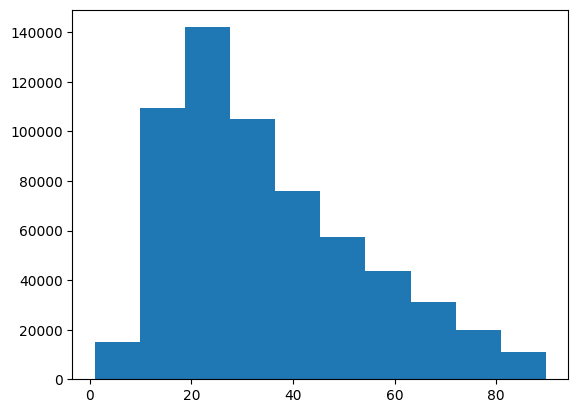

In [2]:
import matplotlib.pyplot as plt

plt.hist(data['총대기시간(분)'])
plt.show()

In [23]:
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/google-noto-cjk/NotoSansCJK-DemiLight.ttc'
fontprop = fm.FontProperties(fname=font_path)

plt.rc('font', family = fontprop.get_name())
plt.rcParams['axes.unicode_minus'] = False

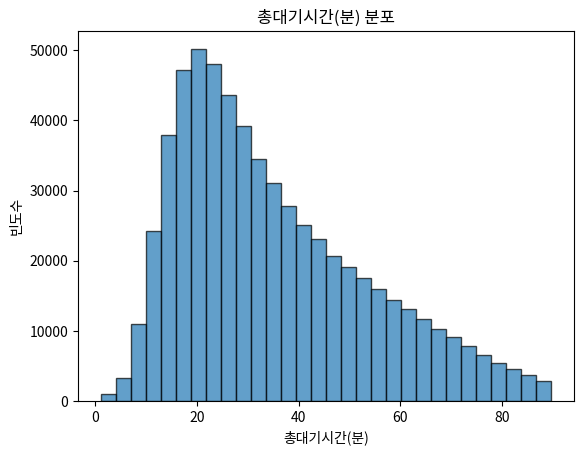

In [24]:
# '총대기시간(분)' 분포 확인
plt.hist(data['총대기시간(분)'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('총대기시간(분)')
plt.ylabel('빈도수')
plt.title('총대기시간(분) 분포')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2f8f664f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2f8f67e4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2f8f664c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2f8f67ea00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2f8f67eca0>],
 'means': []}

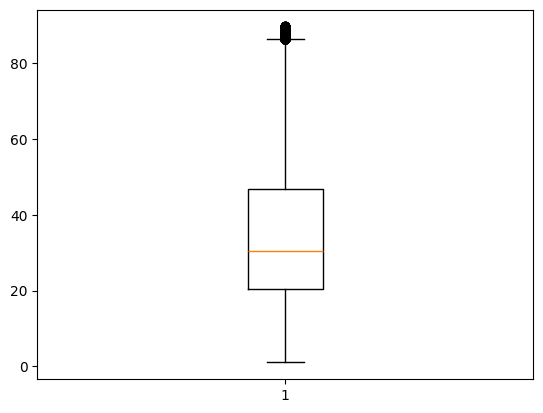

In [4]:
fig, ax = plt.subplots()
ax.boxplot(data['총대기시간(분)'])

In [5]:
max(data['총대기시간(분)'])

89.7715

In [6]:
min(data['총대기시간(분)'])

1.0085

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import numpy as np

# 데이터 프레임에서 수치형 데이터 추출
numerical_data = data.select_dtypes(include=[np.number])

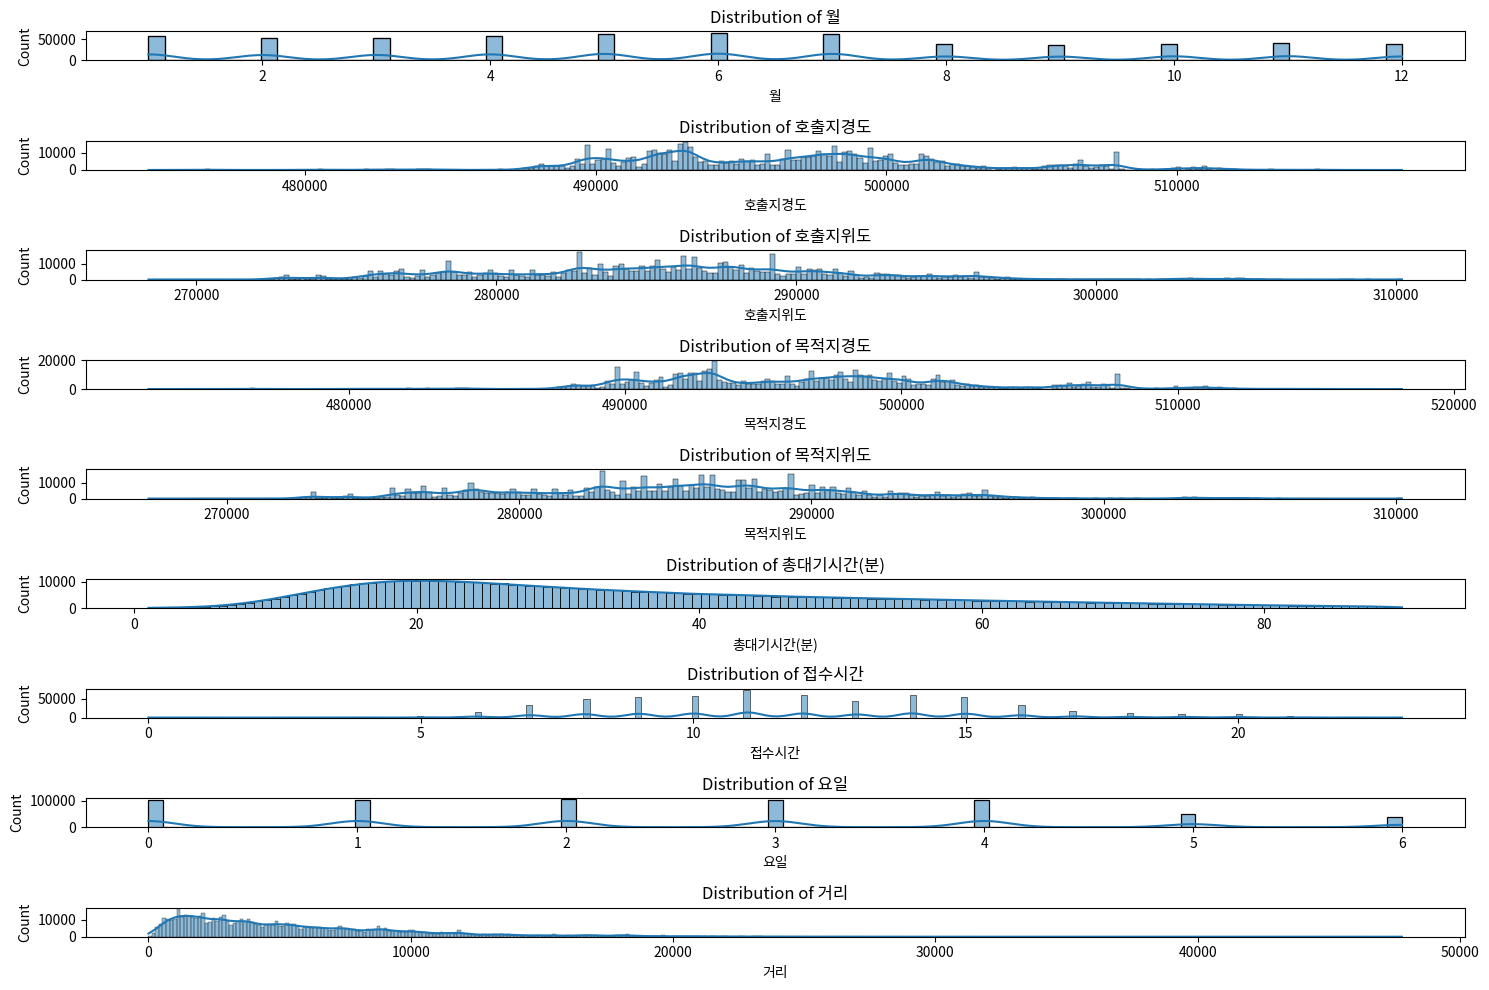

In [25]:
# 정규분포 시각화
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_data.columns):
    plt.subplot(len(numerical_data.columns), 1, i + 1)
    sns.histplot(numerical_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

총대기시간(분)    1.000000
월           0.097914
거리          0.081189
호출지경도       0.003598
목적지경도      -0.009832
목적지위도      -0.073253
호출지위도      -0.075965
접수시간       -0.118891
요일         -0.153419
Name: 총대기시간(분), dtype: float64


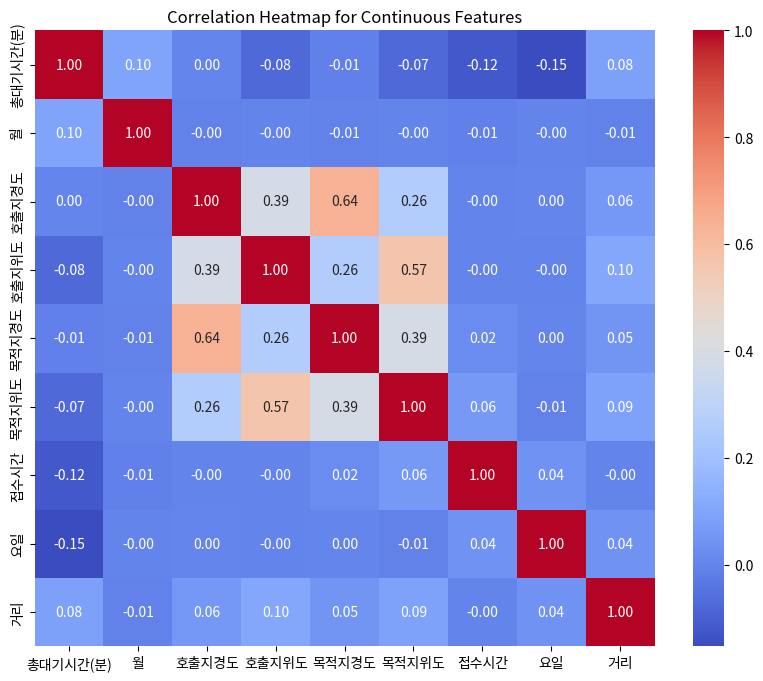

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 연속형 변수만 골라서 데이터프레임 생성
continuous_features = data.select_dtypes(include=['float64', 'int64'])

# '총대기시간(분)'을 포함한 연속형 데이터만 추출
continuous_features = continuous_features[['총대기시간(분)'] + [col for col in continuous_features.columns if col != '총대기시간(분)']]

# 연속형 변수 간 상관계수 분석
corr = continuous_features.corr()
print(corr['총대기시간(분)'].sort_values(ascending=False))

# 히트맵으로 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Continuous Features')
plt.show()

원핫인코딩 후 관계 알아보기

In [32]:
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 준비
data_encoded = data.copy()  # data 변수를 사용

# 접수일시에서 초와 년도 제거
data_encoded['접수일시'] = data['접수일시'].dt.strftime('%m-%d %H:%M')

# 주말과 공휴일을 숫자로 변환 (True: 1, False: 0)
data_encoded['주말'] = data_encoded['주말'].astype(int)
data_encoded['공휴일'] = data_encoded['공휴일'].astype(int)

# 범주형 변수 목록
categorical_columns = ['출발지역', '목적지역']

# 원-핫 인코딩 적용
data_encoded = pd.get_dummies(data_encoded, columns=categorical_columns)

# 결과 확인
data_encoded.head()

/home/alsghk01/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,접수일시,월,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,...,목적지역_부산 부산진구,목적지역_부산 북구,목적지역_부산 사상구,목적지역_부산 사하구,목적지역_부산 서구,목적지역_부산 수영구,목적지역_부산 연제구,목적지역_부산 영도구,목적지역_부산 중구,목적지역_부산 해운대구
0,01-01 05:06,1,489507,285817,491872,284227,41.345050,0,1,5,...,False,False,True,False,False,False,False,False,False,False
1,01-01 05:32,1,498495,288086,495760,284851,18.931717,0,1,5,...,True,False,False,False,False,False,False,False,False,False
2,01-01 05:57,1,498923,286584,487815,279035,82.792883,0,1,5,...,False,False,False,True,False,False,False,False,False,False
3,01-01 06:21,1,493723,285383,499594,297423,51.678117,0,1,6,...,False,False,False,False,False,False,False,False,False,False
4,01-01 06:33,1,494108,290599,498091,287066,33.817833,0,1,6,...,True,False,False,False,False,False,False,False,False,False


In [33]:
data_encoded.columns

Index(['접수일시', '월', '호출지경도', '호출지위도', '목적지경도', '목적지위도', '총대기시간(분)', '주말',
       '공휴일', '접수시간', '요일', '거리', '출발지역_부산', '출발지역_부산 강서구', '출발지역_부산 금정구',
       '출발지역_부산 기장군', '출발지역_부산 남구', '출발지역_부산 동구', '출발지역_부산 동래구',
       '출발지역_부산 부산진구', '출발지역_부산 북구', '출발지역_부산 사상구', '출발지역_부산 사하구',
       '출발지역_부산 서구', '출발지역_부산 수영구', '출발지역_부산 연제구', '출발지역_부산 영도구', '출발지역_부산 중구',
       '출발지역_부산 해운대구', '목적지역_부산', '목적지역_부산 강서구', '목적지역_부산 금정구', '목적지역_부산 기장군',
       '목적지역_부산 남구', '목적지역_부산 동구', '목적지역_부산 동래구', '목적지역_부산 부산진구', '목적지역_부산 북구',
       '목적지역_부산 사상구', '목적지역_부산 사하구', '목적지역_부산 서구', '목적지역_부산 수영구',
       '목적지역_부산 연제구', '목적지역_부산 영도구', '목적지역_부산 중구', '목적지역_부산 해운대구'],
      dtype='object')

In [51]:
data_encoded_start = data_encoded.iloc[:, 1:]
data_encoded_start

,월,호출지경도,호출지위도,목적지경도,목적지위도,총대기시간(분),주말,공휴일,접수시간,요일,...,목적지역_부산 부산진구,목적지역_부산 북구,목적지역_부산 사상구,목적지역_부산 사하구,목적지역_부산 서구,목적지역_부산 수영구,목적지역_부산 연제구,목적지역_부산 영도구,목적지역_부산 중구,목적지역_부산 해운대구
0,1,489507,285817,491872,284227,41.345050,0,1,5,2,...,False,False,True,False,False,False,False,False,False,False
1,1,498495,288086,495760,284851,18.931717,0,1,5,2,...,True,False,False,False,False,False,False,False,False,False
2,1,498923,286584,487815,279035,82.792883,0,1,5,2,...,False,False,False,True,False,False,False,False,False,False
3,1,493723,285383,499594,297423,51.678117,0,1,6,2,...,False,False,False,False,False,False,False,False,False,False
4,1,494108,290599,498091,287066,33.817833,0,1,6,2,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610320,7,501300,288679,507568,286400,41.235333,1,0,21,6,...,False,False,False,False,False,False,False,False,False,True
610321,7,506206,292715,509093,287693,49.372783,1,0,21,6,...,False,False,False,False,False,False,False,False,False,True
610322,7,506180,285160,506010,304852,48.949617,1,0,21,6,...,False,False,False,False,False,False,False,False,False,False
610323,7,502745,286538,501997,285978,84.516000,1,0,21,6,...,False,False,False,False,False,True,False,False,False,False


총대기시간(분)        1.000000
월               0.097914
거리              0.081189
출발지역_부산 사하구     0.067461
목적지역_부산 서구      0.061395
출발지역_부산 강서구     0.045866
출발지역_부산 기장군     0.040435
출발지역_부산 남구      0.033542
출발지역_부산 영도구     0.028092
출발지역_부산 서구      0.023671
목적지역_부산 사하구     0.021676
목적지역_부산 부산진구    0.015351
목적지역_부산 영도구     0.013537
출발지역_부산 수영구     0.011437
목적지역_부산 남구      0.010292
출발지역_부산 동구      0.007439
목적지역_부산 연제구     0.004488
호출지경도           0.003598
목적지역_부산 중구      0.003562
출발지역_부산 중구      0.003210
출발지역_부산         0.002544
목적지역_부산 강서구     0.001075
출발지역_부산 해운대구   -0.000442
목적지역_부산 기장군    -0.000570
목적지역_부산 사상구    -0.000723
목적지역_부산        -0.002158
목적지역_부산 동구     -0.002536
목적지역_부산 해운대구   -0.004991
목적지역_부산 수영구    -0.005822
목적지경도          -0.009832
출발지역_부산 연제구    -0.011865
출발지역_부산 부산진구   -0.012488
목적지역_부산 동래구    -0.024109
목적지역_부산 금정구    -0.024207
출발지역_부산 사상구    -0.028642
출발지역_부산 동래구    -0.033356
출발지역_부산 금정구    -0.035480
목적지역_부산 북구     -0.058033
출발지역_부산 북구     -0.064555
목적지위도          -0.073253


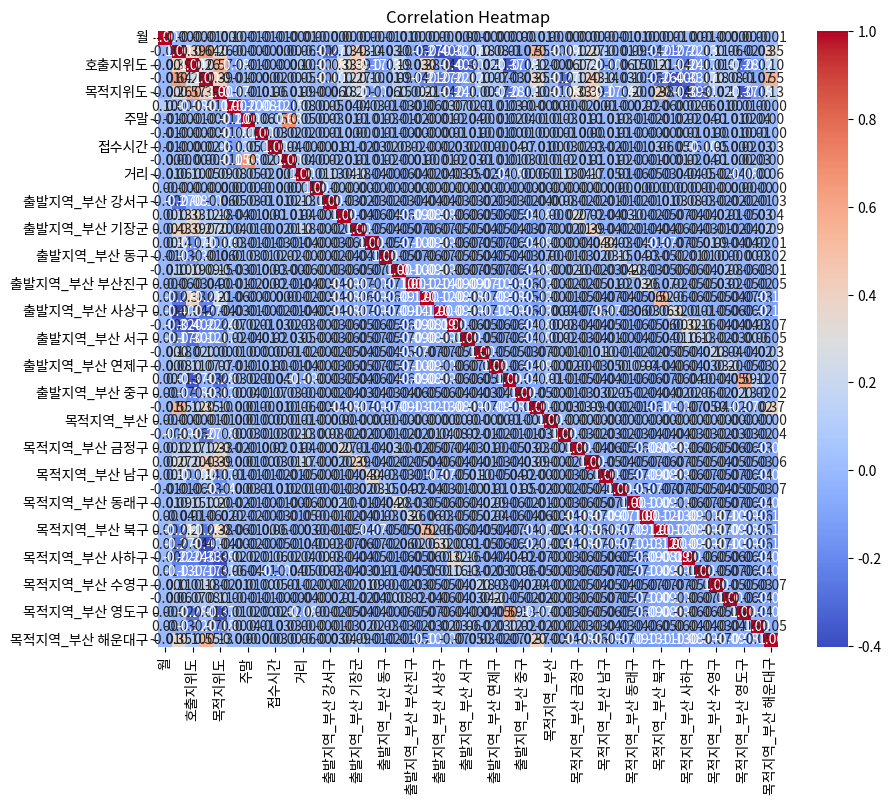

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
corr = data_encoded_start.corr()

# '총대기시간(분)'과 다른 feature들 상관계수 보기
print(corr['총대기시간(분)'].sort_values(ascending=False))

# 히트맵으로 시각화
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

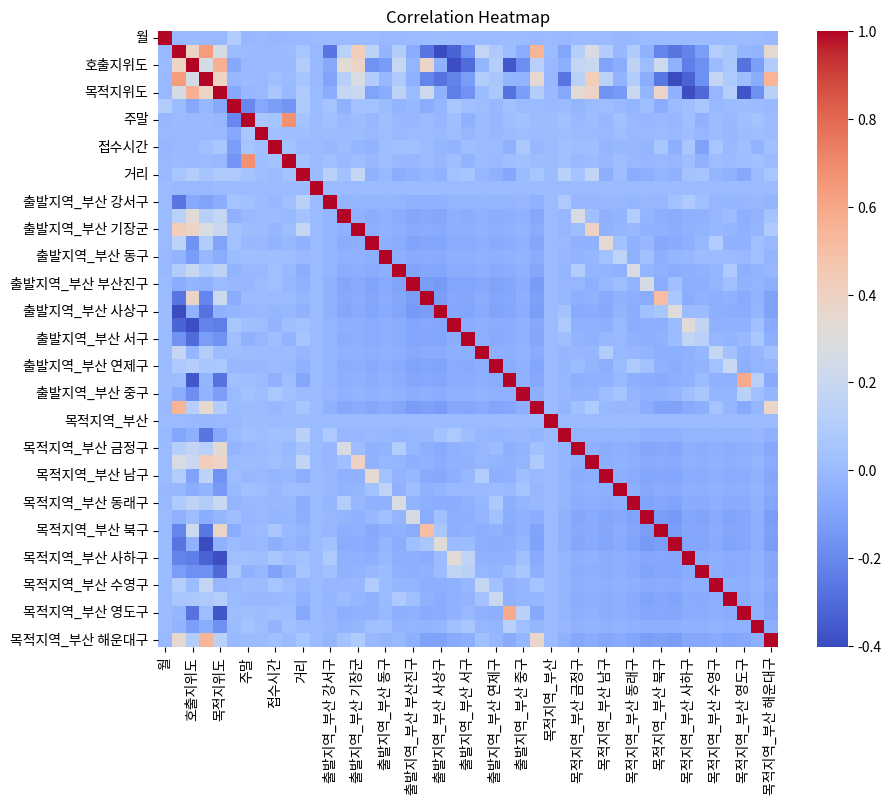

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 그리기 (숫자 없이)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')  # annot=False로 숫자 제거
plt.title('Correlation Heatmap')
plt.show() 

암호화된 위경도 방향 살펴보기

In [57]:
data[['출발지역', '호출지경도']].sort_values(by='호출지경도').head(30)

,출발지역,호출지경도
268453,부산 강서구,474609
235092,부산 강서구,474610
411041,부산 강서구,474610
181704,부산 강서구,474627
561619,부산 강서구,474628
286225,부산 강서구,475195
528297,부산 강서구,475268
310392,부산 강서구,475268
479089,부산 강서구,475268
417825,부산 강서구,475268


In [58]:
data[['출발지역', '호출지위도']].sort_values(by='호출지위도').head(30)

,출발지역,호출지위도
52420,부산 강서구,268398
52421,부산 강서구,268436
411102,부산 강서구,268462
245169,부산 강서구,268478
463811,부산 강서구,268479
573551,부산 강서구,268646
74513,부산 강서구,268822
600533,부산 강서구,268872
181704,부산 강서구,270218
561619,부산 강서구,270220


In [55]:
data[['출발지역', '호출지경도']].sort_values(by='호출지경도', ascending=False).head(30)

,출발지역,호출지경도
626823,부산 기장군,517737
29996,부산 기장군,517151
228537,부산 기장군,517076
39155,부산 기장군,517050
12315,부산 기장군,517050
81814,부산 기장군,516944
231026,부산 기장군,516874
278733,부산 기장군,516874
273522,부산 기장군,516821
256872,부산 기장군,516821


In [57]:
data[['출발지역', '호출지위도']].sort_values(by='호출지위도', ascending=False).head(30)

,출발지역,호출지위도
105703,부산 기장군,310200
350569,부산 기장군,310200
119424,부산 기장군,310200
181643,부산 기장군,310200
361923,부산 기장군,310200
207023,부산 기장군,310200
154723,부산 기장군,310200
334419,부산 기장군,310200
402174,부산 기장군,310200
42393,부산 기장군,310200


In [66]:
data[['목적지역', '목적지경도']].sort_values(by='목적지경도').head(30)

,목적지역,목적지경도
49910,부산,472744
524845,부산 강서구,474553
268194,부산 강서구,474609
410715,부산 강서구,474610
234903,부산 강서구,474610
181648,부산 강서구,474627
560857,부산 강서구,474628
546607,부산 강서구,474628
500246,부산 강서구,475268
152520,부산 강서구,475268


In [67]:
data[['목적지역', '목적지위도']].sort_values(by='목적지위도').head(30)

,목적지역,목적지위도
573339,부산 강서구,267309
52370,부산 강서구,268398
52352,부산 강서구,268436
411041,부산 강서구,268462
245147,부산 강서구,268478
522794,부산 강서구,268486
67988,부산 강서구,268516
378165,부산 강서구,268532
588730,부산 강서구,268872
49910,부산,269248


In [68]:
data[['목적지역', '목적지경도']].sort_values(by='목적지경도', ascending=False).head(30)

,목적지역,목적지경도
67331,부산 기장군,518119
626710,부산 기장군,517737
346682,부산 기장군,517737
29807,부산 기장군,517178
42393,부산 기장군,517050
278864,부산 기장군,516874
231160,부산 기장군,516874
351024,부산 기장군,516855
360540,부산 기장군,516854
232607,부산 기장군,516821


In [69]:
data[['목적지역', '목적지위도']].sort_values(by='목적지위도', ascending=False).head(30)

,목적지역,목적지위도
137924,부산 기장군,310208
54747,부산 기장군,310200
252520,부산 기장군,310200
343687,부산 기장군,310200
132330,부산 기장군,310200
220533,부산 기장군,310200
123602,부산 기장군,310200
221203,부산 기장군,310200
181989,부산 기장군,310200
408321,부산 기장군,310200
